In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
m_teams = pd.read_csv("D:\Source\Orion_innovation_internship_repos\Basketball_Bracket_Forecasting_2024\Datasets\MTeams.csv")
w_teams = pd.read_csv("D:\Source\Orion_innovation_internship_repos\Basketball_Bracket_Forecasting_2024\Datasets\WTeams.csv")

In [12]:
m_teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2024
1,1102,Air Force,1985,2024
2,1103,Akron,1985,2024
3,1104,Alabama,1985,2024
4,1105,Alabama A&M,2000,2024


In [13]:
w_teams.head()

,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M


In [14]:
m_teams.tail()

,TeamID,TeamName,FirstD1Season,LastD1Season
373,1474,Queens NC,2023,2024
374,1475,Southern Indiana,2023,2024
375,1476,Stonehill,2023,2024
376,1477,TX A&M Commerce,2023,2024
377,1478,Le Moyne,2024,2024


In [15]:
w_teams.tail()

,TeamID,TeamName
371,3474,Queens NC
372,3475,Southern Indiana
373,3476,Stonehill
374,3477,TX A&M Commerce
375,3478,Le Moyne


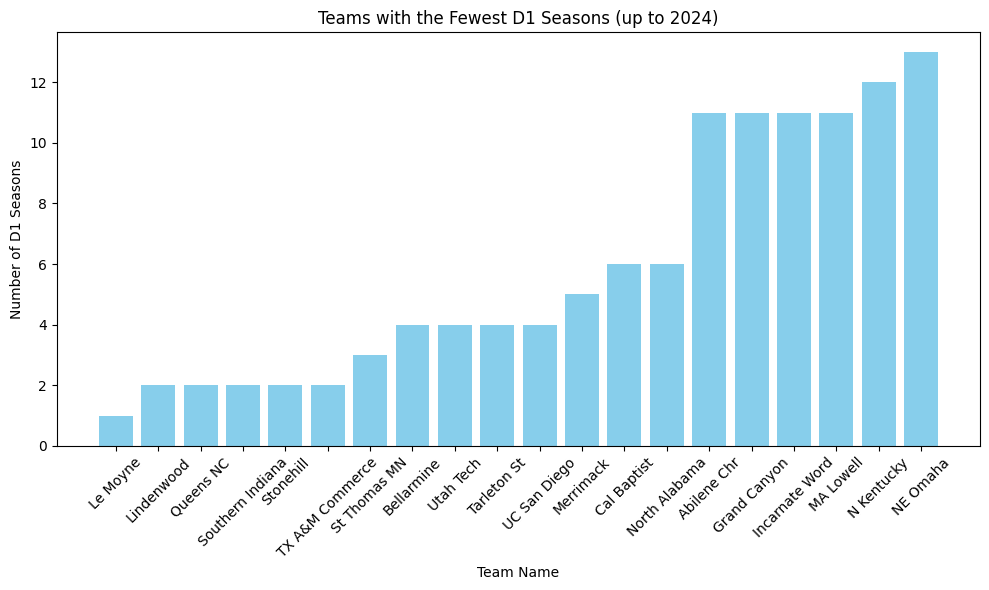

In [16]:
m_teams['D1Seasons'] = m_teams['LastD1Season'] - m_teams['FirstD1Season'] + 1
df_d1_2024 = m_teams[m_teams['LastD1Season'] == 2024]
fewest_d1_seasons = df_d1_2024.nsmallest(20, 'D1Seasons')

plt.figure(figsize=(10, 6))
plt.bar(fewest_d1_seasons['TeamName'], fewest_d1_seasons['D1Seasons'], color='skyblue')
plt.title('Teams with the Fewest D1 Seasons (up to 2024)')
plt.xlabel('Team Name')
plt.ylabel('Number of D1 Seasons')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [18]:
m_seasons = pd.read_csv("D:\Source\Orion_innovation_internship_repos\Basketball_Bracket_Forecasting_2024\Datasets\MSeasons.csv")
w_seasons = pd.read_csv("D:\Source\Orion_innovation_internship_repos\Basketball_Bracket_Forecasting_2024\Datasets\WSeasons.csv")

In [20]:
m_seasons.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


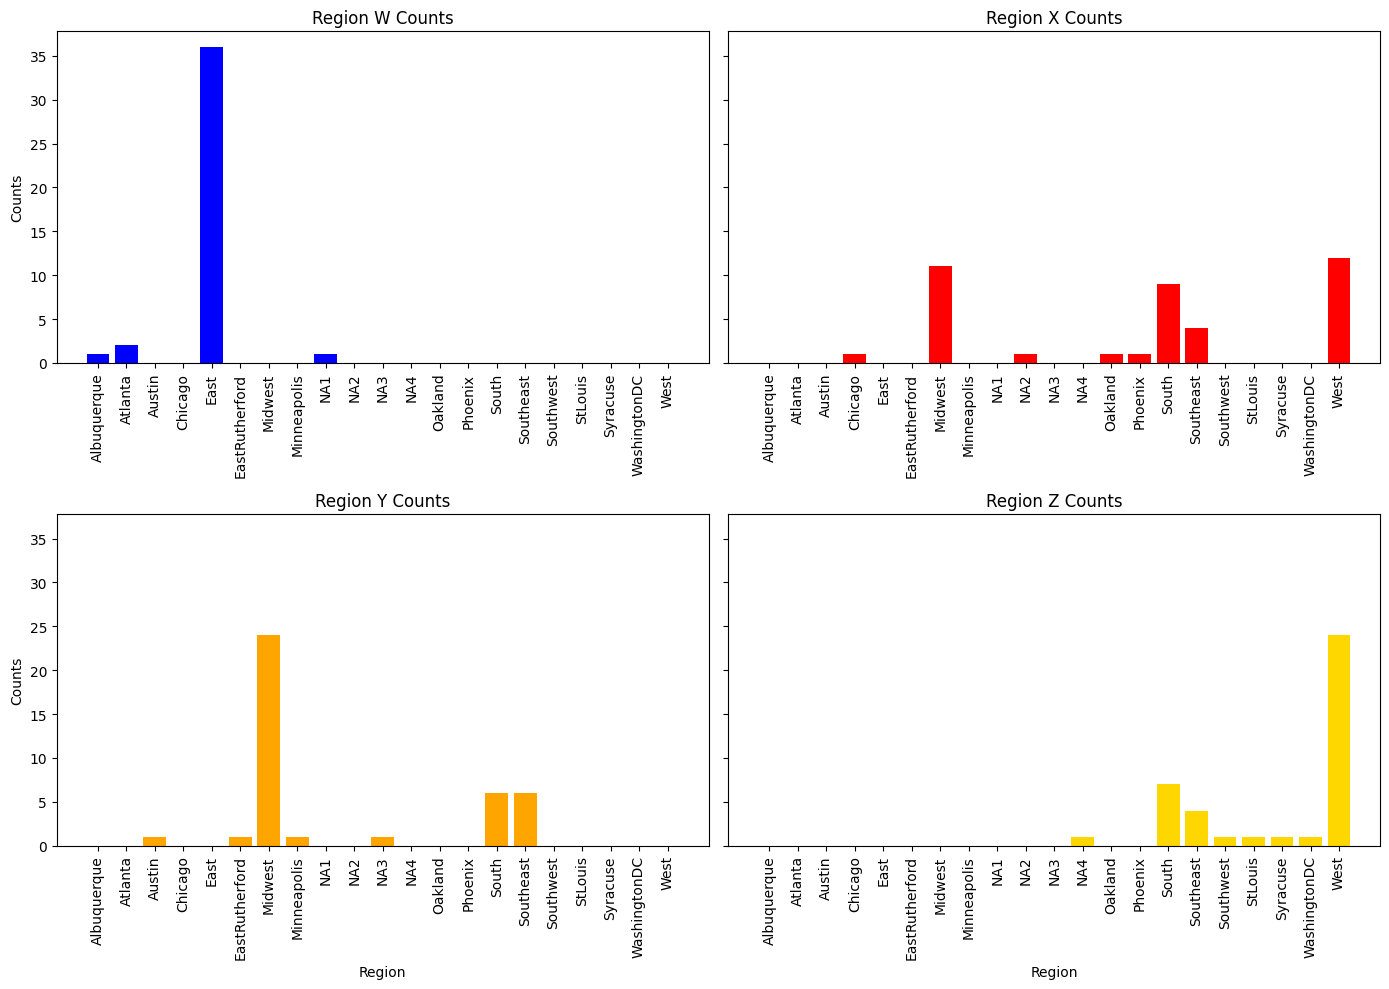

In [21]:
def plot_regions(df):
    region_w_counts = df['RegionW'].value_counts()
    region_x_counts = df['RegionX'].value_counts()
    region_y_counts = df['RegionY'].value_counts()
    region_z_counts = df['RegionZ'].value_counts()
    
    region_counts = pd.DataFrame({
        'RegionW': region_w_counts,
        'RegionX': region_x_counts,
        'RegionY': region_y_counts,
        'RegionZ': region_z_counts
    })

    region_counts = region_counts.fillna(0).astype(int)

    fig, ax = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

    ax[0, 0].bar(region_counts.index, region_counts['RegionW'], color='blue')
    ax[0, 0].set_title('Region W Counts')
    ax[0, 0].set_ylabel('Counts')
    ax[0, 0].tick_params(axis='x', rotation=90)

    ax[0, 1].bar(region_counts.index, region_counts['RegionX'], color='red')
    ax[0, 1].set_title('Region X Counts')
    ax[0, 1].tick_params(axis='x', rotation=90)

    ax[1, 0].bar(region_counts.index, region_counts['RegionY'], color='orange')
    ax[1, 0].set_title('Region Y Counts')
    ax[1, 0].set_ylabel('Counts')
    ax[1, 0].set_xlabel('Region')
    ax[1, 0].tick_params(axis='x', rotation=90)

    ax[1, 1].bar(region_counts.index, region_counts['RegionZ'], color='gold')
    ax[1, 1].set_title('Region Z Counts')
    ax[1, 1].set_xlabel('Region')
    ax[1, 1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

plot_regions(m_seasons)

In [22]:
m_seeds = pd.read_csv("D:\Source\Orion_innovation_internship_repos\Basketball_Bracket_Forecasting_2024\Datasets\MNCAATourneySeeds.csv")
w_seeds = pd.read_csv("D:\Source\Orion_innovation_internship_repos\Basketball_Bracket_Forecasting_2024\Datasets\WNCAATourneySeeds.csv")
m_seeds.head()


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [23]:
#MERGING m_seed and w_seed with m_teams and w_teams

m_seeds = pd.merge(m_teams[['TeamID', 'TeamName']], m_seeds, on='TeamID')
w_seeds = pd.merge(w_teams[['TeamID', 'TeamName']], w_seeds, on='TeamID')
m_seeds.head()

,TeamID,TeamName,Season,Seed
0,1101,Abilene Chr,2019,Y15
1,1101,Abilene Chr,2021,W14
2,1102,Air Force,2004,W11
3,1102,Air Force,2006,Z13
4,1103,Akron,1986,X15


In [24]:
w_seeds.head()

,TeamID,TeamName,Season,Seed
0,3101,Abilene Chr,2019,Y16
1,3103,Akron,2014,Z13
2,3104,Alabama,1998,X02
3,3104,Alabama,1999,Y05
4,3104,Alabama,2021,X07


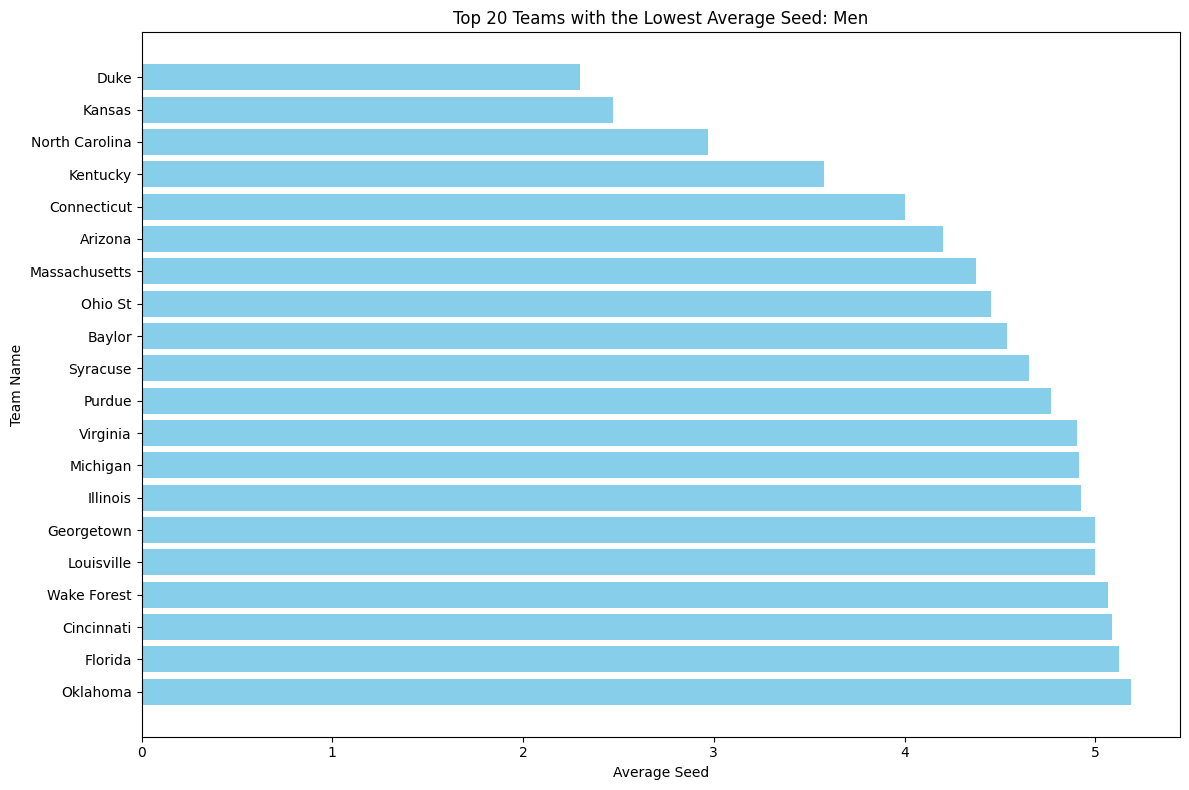

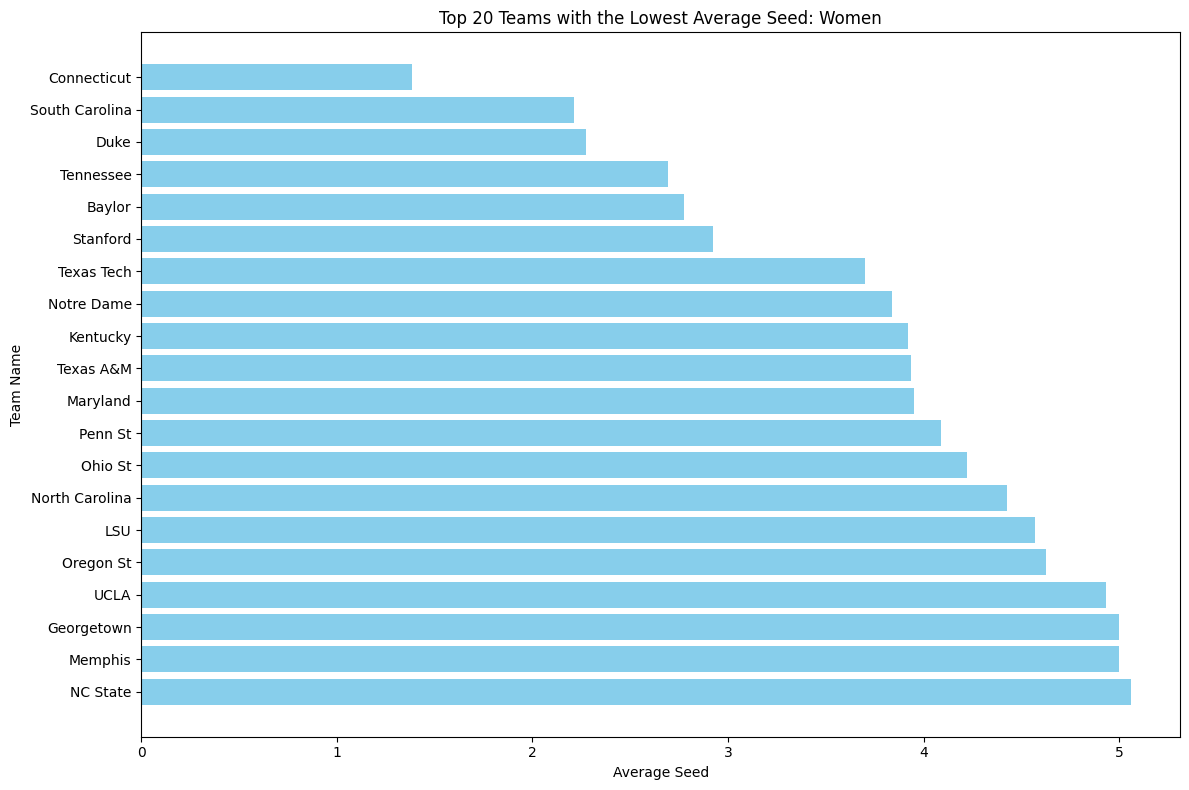

In [28]:
def plot_seeds(df, title):

    df['NumericSeed'] = df['Seed'].str.extract('(\d+)').astype(int)

    average_seeds = df.groupby('TeamName')['NumericSeed'].mean().reset_index()

    top_20_average_seeds = average_seeds.nsmallest(20, 'NumericSeed')

    plt.figure(figsize=(12, 8))
    plt.barh(top_20_average_seeds['TeamName'], top_20_average_seeds['NumericSeed'], color='skyblue')
    plt.title(f"Top 20 Teams with the Lowest Average Seed: {title}")
    plt.xlabel('Average Seed')
    plt.ylabel('Team Name')
    plt.gca().invert_yaxis()
    plt.tight_layout()

    plt.show()

plot_seeds(m_seeds, "Men")
plot_seeds(w_seeds, "Women")